In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from itertools import combinations

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
from statannotations.Annotator import Annotator

# plot setting
%config InlineBackend.figure_formats = ["svg"]
font_manager.fontManager.addfont("./Helvetica.ttf")
plot_config = {
    "font.sans-serif": ["Helvetica", "SimHei"],
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",
}
plt.rcParams.update(plot_config)

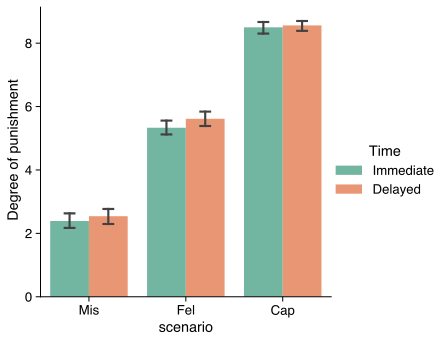

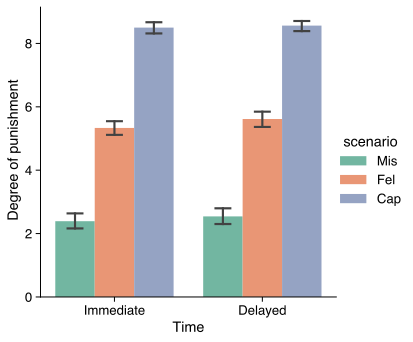

In [2]:
sns.set_context("paper", font_scale=1.5)
excel_path = "./data/56law23.xlsx"
for sheet_name in pd.ExcelFile(excel_path).sheet_names:
    df = pd.read_excel(excel_path, sheet_name=sheet_name)
    df.rename({"case": "Scenario", "time": "Time"}, axis=1, inplace=True)

    # 3*2
    ax = sns.catplot(kind="bar", x=df.columns[-3], hue=df.columns[-2], y=df.columns[-1], data=df, capsize=0.1, palette="Set2")
    # ax.set_xlabels("")
    plt.savefig(f"./figures/56law23_3x2.svg", bbox_inches="tight")

    # 2*3
    ax = sns.catplot(kind="bar", x=df.columns[-2], hue=df.columns[-3], y=df.columns[-1], data=df, capsize=0.1, palette="Set2")
    # ax.set_xlabels("")
    plt.savefig(f"./figures/56law23_2x3.svg", bbox_inches="tight")

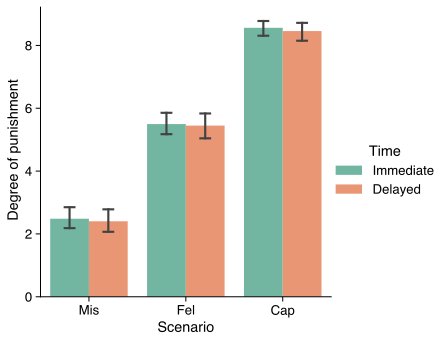

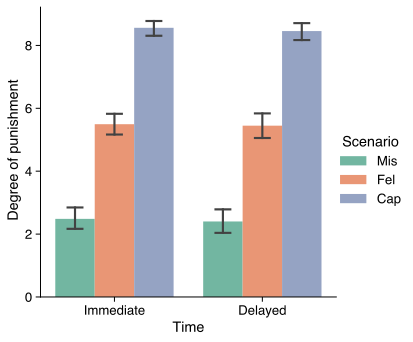

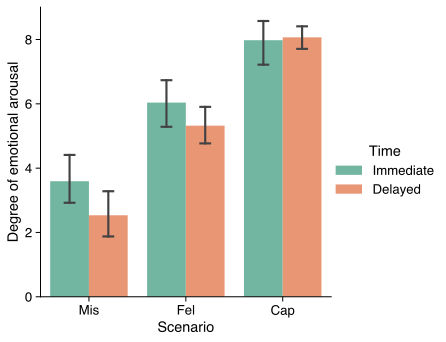

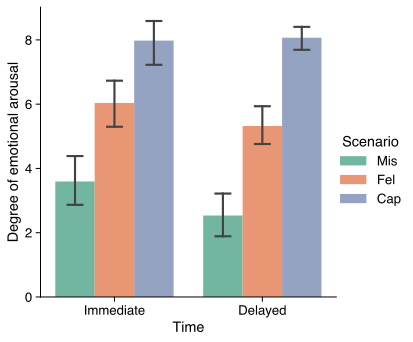

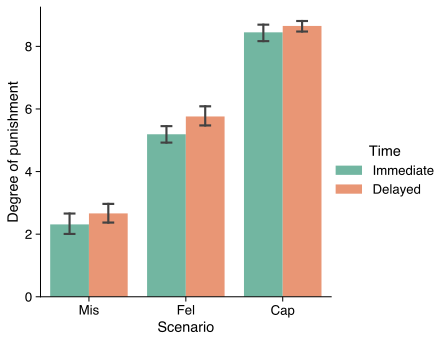

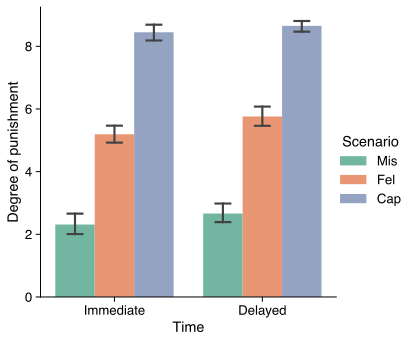

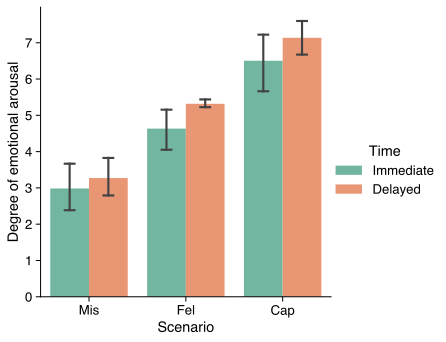

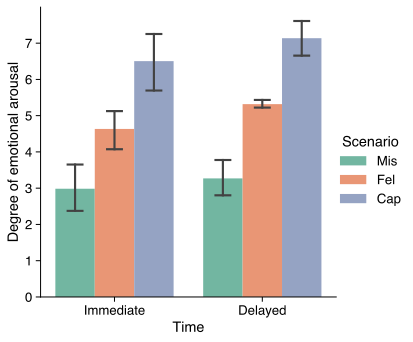

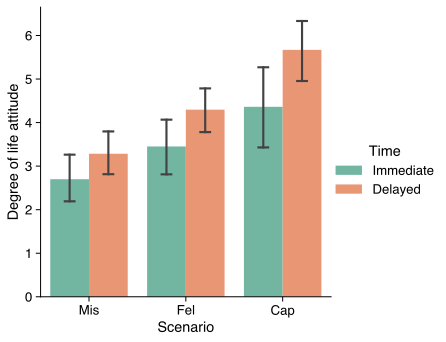

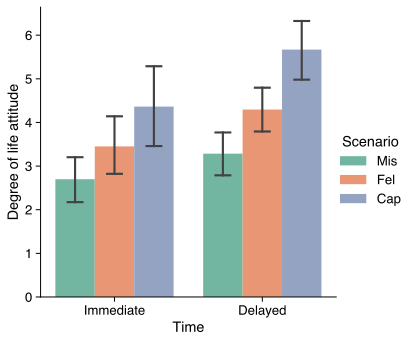

In [39]:
sns.set_context("paper", font_scale=1.5)
excel_path = "./data/0916_2x3.xlsx"
for sheet_name in pd.ExcelFile(excel_path).sheet_names:
    df = pd.read_excel(excel_path, sheet_name=sheet_name)
    df.rename({"case": "Scenario", "time": "Time"}, axis=1, inplace=True)

    # 3*2
    ax = sns.catplot(kind="bar", x=df.columns[-3], hue=df.columns[-2], y=df.columns[-1], data=df, capsize=0.1, palette="Set2")
    # ax.set_xlabels("")
    plt.savefig(f"./figures/0916/{sheet_name}_3x2.svg", bbox_inches="tight")

    # 2*3
    ax = sns.catplot(kind="bar", x=df.columns[-2], hue=df.columns[-3], y=df.columns[-1], data=df, capsize=0.1, palette="Set2")
    # ax.set_xlabels("")
    plt.savefig(f"./figures/0916/{sheet_name}_2x3.svg", bbox_inches="tight")

## Heatmap

In [ ]:
spp_heatmap_data = pd.read_excel("./data/SPPBASandBIS.xlsx")
tpp_heatmap_data = pd.read_excel("./data/TPPBASandBIS.xlsx")

In [60]:
def plot_corr_matrix(data, title, calculation=stats.pearsonr, vlim=(-1, 1)):
        # define matrix
        labels = list(data.columns)
        corr_matrix = np.zeros((len(labels), len(labels)))
        p_matrix = np.zeros_like(corr_matrix)
        # calculate matrix
        for i, col_i in enumerate(labels):
            for j, col_j in enumerate(labels):
                # get correlation/difference
                corr_matrix[i, j], p_matrix[i, j] = calculation(data[col_i], data[col_j])
                p_matrix[i, j] = 1 if i == j else p_matrix[i, j]
        # plot matrix
        sig_annot = np.array([[("*" if p < 0.05 else "") + ("*" if p < 0.01 else "")\
            + ("*" if p < 0.001 else "") for p in row] for row in p_matrix])
        ax = sns.heatmap(corr_matrix, vmin=vlim[0], vmax=vlim[1], cmap="coolwarm", annot=sig_annot, annot_kws={"fontsize": 16}, fmt="", cbar_kws={"pad": 0.01}, square=True)
        ax.set_title(title, fontsize=16)
        ax.xaxis.set_tick_params(rotation=90)
        ax.yaxis.set_tick_params(rotation=0)
        ax.set_xticklabels(labels, fontsize=12)
        ax.set_yticklabels(labels, fontsize=12)
        plt.savefig(f"./data/{title}_heatmap.svg", bbox_inches="tight")

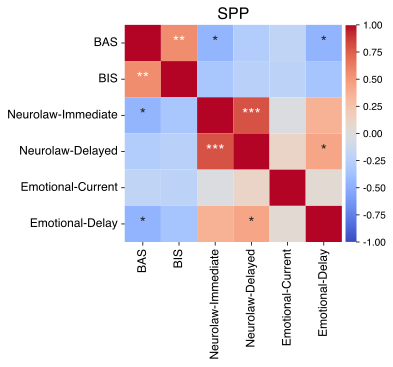

In [61]:
plot_corr_matrix(spp_heatmap_data.iloc[:, 1:], "SPP")

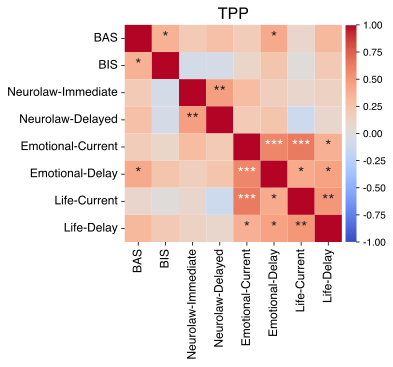

In [62]:
plot_corr_matrix(tpp_heatmap_data.iloc[:, 1:], "TPP")

## t-test

In [235]:
def two_condition_ttest(df, save_path=None, xlabel="", ylabel="", title=""):
    order = df.columns
    x = "Condition"
    y = "Value"
    melt_df = pd.melt(df[order], var_name=x, value_name=y)
    ax = sns.boxplot(data=melt_df, x=x, y=y, width=.3, palette="Set2", saturation=.5, showfliers=False)
    sns.stripplot(data=melt_df, x=x, y=y, palette="Set2")
    # annotation
    pairs = list(combinations(order, 2))
    annotator = Annotator(ax, pairs, data=melt_df, x=x, y=y, order=order)
    annotator.configure(test="t-test_paired", text_format="star", loc="inside")
    annotator.apply_and_annotate()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, pad=10)
    plt.ylim((0, 9.5))
    plt.yticks(list(range(10)))
    if save_path:
        plt.savefig(save_path)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Emotional arousal-Current vs. Emotional arousal-Delay: t-test paired samples, P_val:1.691e-01 t=1.416e+00


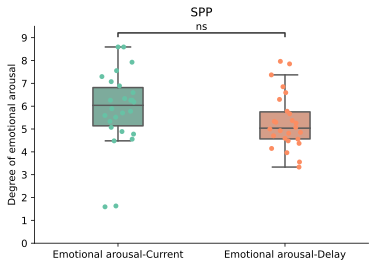

In [236]:
df = pd.read_excel("./new_ttest/SPPTtest.xlsx")
two_condition_ttest(df, save_path="./new_ttest/SPPTtest.svg", ylabel="Degree of emotional arousal", title="SPP")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Emotional arousal-Current vs. Emotional arousal-Delay: t-test paired samples, P_val:4.984e-02 t=-2.047e+00


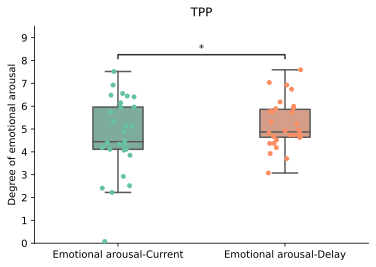

In [237]:
df = pd.read_excel("./new_ttest/TPPemotioanTtest.xlsx")
two_condition_ttest(df, save_path="./new_ttest/TPPemotioanTtest.svg", ylabel="Degree of emotional arousal", title="TPP")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Life attitude-Current vs. Life attitude-Delay: t-test paired samples, P_val:4.601e-03 t=-3.071e+00


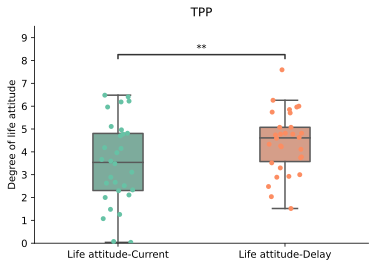

In [238]:
df = pd.read_excel("./new_ttest/TPPlifeTtext.xlsx")
two_condition_ttest(df, save_path="./new_ttest/TPPlifeTtext.svg", ylabel="Degree of life attitude", title="TPP")

## ANOVA

In [239]:
def anova_plot(data, p_vals, save_path=None, xlabel="", ylabel="", title=""):
    order = data.columns
    x = "Condition"
    y = "Value"
    melt_df = pd.melt(data[order], var_name=x, value_name=y)
    # same melt data
    ax = sns.boxplot(data=melt_df, x=x, y=y, width=.3, palette="Set2", saturation=.5, showfliers=False)
    sns.stripplot(data=melt_df, x=x, y=y, palette="Set2")
    # annotation
    # p values corresponding to the pairs
    # p_vals = [6.352e-01, 1.318e-03, 5.940e-04]
    # pairs = [("A", "B"), ("B", "C"), ("A", "C")]
    pairs = list(combinations(order, 2))
    annotator = Annotator(ax, pairs, data=melt_df, x=x, y=y, order=order)
    annotator.configure(test=None, loc="inside")
    annotator.set_pvalues(p_vals)
    # do not use apply_and_annotate here
    annotator.annotate()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, pad=10)
    plt.ylim((0, 12))
    # plt.yticks(list(range(10)))
    if save_path:
        plt.savefig(save_path, tight_layout=True)
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Arousal-Misdemeanor vs. Arousal-Felony: Custom statistical test, P_val:1.000e-03
Arousal-Felony vs. Arousal-Capital Offense: Custom statistical test, P_val:1.000e-03
Arousal-Misdemeanor vs. Arousal-Capital Offense: Custom statistical test, P_val:1.000e-03


C:\Users\Kun Chen\AppData\Local\Temp\ipykernel_2736\113474345.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(save_path, tight_layout=True)


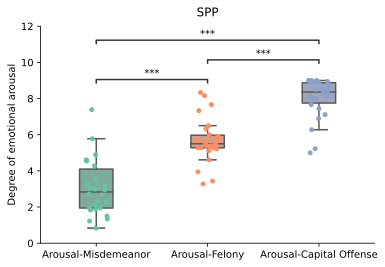

In [240]:
df = pd.read_excel("./new_ttest/SPPone.xlsx")
anova_plot(df, p_vals=[1e-3]*3, save_path="./new_ttest/SPPone.svg", ylabel="Degree of emotional arousal", title="SPP")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Arousal-Misdemeanor vs. Arousal-Felony: Custom statistical test, P_val:1.000e-03
Arousal-Felony vs. Arousal-Capital Offense: Custom statistical test, P_val:1.000e-03
Arousal-Misdemeanor vs. Arousal-Capital Offense: Custom statistical test, P_val:1.000e-03


C:\Users\Kun Chen\AppData\Local\Temp\ipykernel_2736\113474345.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(save_path, tight_layout=True)


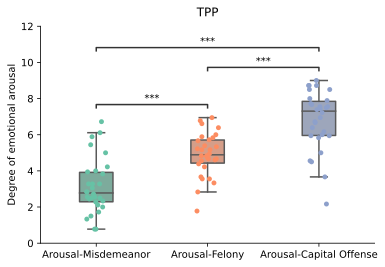

In [241]:
df = pd.read_excel("./new_ttest/TPPemotionalONE.xlsx")
anova_plot(df, p_vals=[1e-3]*3, save_path="./new_ttest/TPPemotionalONE.svg", ylabel="Degree of emotional arousal", title="TPP")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Attitude-Misdemeanor vs. Attitude-Felony: Custom statistical test, P_val:1.000e-03
Attitude-Felony vs. Attitude-Capital Offense: Custom statistical test, P_val:1.000e-03
Attitude-Misdemeanor vs. Attitude-Capital Offense: Custom statistical test, P_val:1.000e-03


C:\Users\Kun Chen\AppData\Local\Temp\ipykernel_2736\113474345.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(save_path, tight_layout=True)


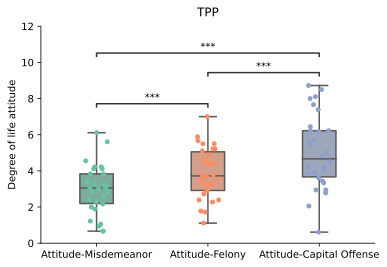

In [242]:
df = pd.read_excel("./new_ttest/TPPlifeONE.xlsx")
anova_plot(df, p_vals=[1e-3]*3, save_path="./new_ttest/TPPlifeONE.svg", ylabel="Degree of life attitude", title="TPP")